In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =pd.read_excel(r"C:\Users\User\Documents\com.moodle.moodlemobile\sites\afd84929a07dc1fee3b8b00ee7458690\filepool\iris_551602dfed4081dc84d56411e4601bee.xls")

In [3]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Check the null values

In [4]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# Fill the null values as median

In [5]:
for features in['SL','SW','PL']:
    data[features]=data[features].fillna(data[features].median())

In [6]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# To check the rows and columns of the dataset

In [7]:
data.shape

(150, 5)

#  To check the basic information

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Handling outliers of the dataset

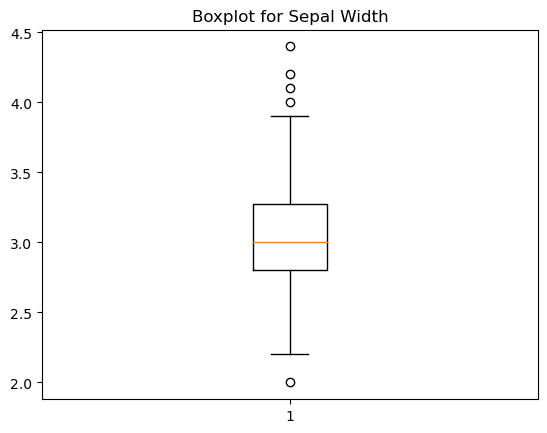

In [9]:
plt.boxplot(data['SW'])
plt.title('Boxplot for Sepal Width')
plt.show()

In [10]:
Q1 = np.percentile(data['SW'],25)
Q2 = np.percentile(data['SW'],50)
Q3 = np.percentile(data['SW'],75)
IQR = Q3 - Q1
low_limit = Q1-1.5*IQR
upr_limit = Q3 + 1.5*IQR
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
print('IQR=',IQR)
print('Lower Limit :',low_limit)
print('Upper Limit :',upr_limit)


Q1= 2.8
Q2= 3.0
Q3= 3.275
IQR= 0.4750000000000001
Lower Limit : 2.0874999999999995
Upper Limit : 3.9875


In [11]:
outlier =[]
for x in data['SW']:
    if x>upr_limit or x<low_limit:
        outlier.append(x)


In [12]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [13]:
ind1 = data['SW']>upr_limit
ind2 = data['SW']<low_limit
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [14]:
data.loc[ind2].index

Int64Index([60], dtype='int64')

In [15]:
data.drop([60,14,15,32,33],inplace = True)

In [16]:
data.shape

(145, 5)

# Logistic Regression 

In [17]:
# To count the values of the categorical feature

In [18]:
data['Classification'].value_counts(normalize = True)

Iris-virginica     0.344828
Iris-versicolor    0.337931
Iris-setosa        0.317241
Name: Classification, dtype: float64

In [19]:
# Label encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])

In [22]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


# Correlation of dataset

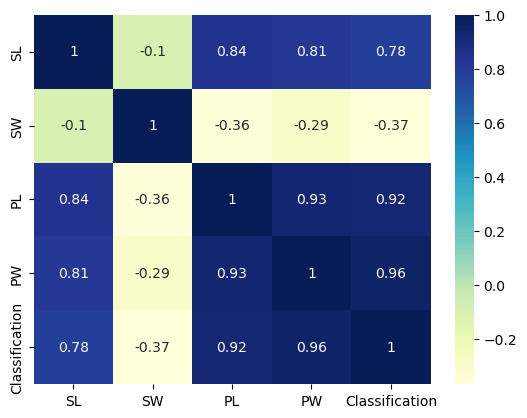

In [23]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix,annot = True,cmap = 'YlGnBu')
plt.show()

In [24]:
x = data.drop('Classification',axis=1) 
y = data['Classification']

In [25]:
x

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


In [26]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 145, dtype: int32

In [27]:
# Splitting training and testing data

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class = 'multinomial',solver ='lbfgs',max_iter = 1000)
model = lr.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [30]:
y_pred

array([1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 2,
       0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 2, 1, 0])

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
confusion_matrix(y_test,y_pred)

array([[14,  1,  0],
       [ 0, 10,  1],
       [ 0,  3, 15]], dtype=int64)

In [32]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred,average = None))
print('Recall = ',recall_score(y_test,y_pred,average = None))
print('F1 score = ',f1_score(y_test,y_pred,average = None))

Accuracy =  0.8863636363636364
Precision =  [1.         0.71428571 0.9375    ]
Recall =  [0.93333333 0.90909091 0.83333333]
F1 score =  [0.96551724 0.8        0.88235294]


# KNN Regression

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
metric_k=[]
neighbors= np.arange(3,15)

In [35]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors =k,metric ='euclidean')
    classifier.fit(x_train,y_train)
    y_predictions = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

In [36]:
metric_k

[0.9318181818181818,
 0.9318181818181818,
 0.9318181818181818,
 0.9090909090909091,
 0.9318181818181818,
 0.9318181818181818,
 0.9318181818181818,
 0.9318181818181818,
 0.9318181818181818,
 0.8863636363636364,
 0.9318181818181818,
 0.9090909090909091]

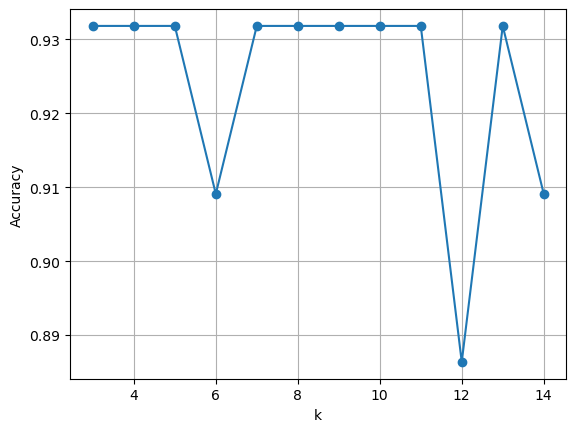

In [37]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

In [38]:
 classifier = KNeighborsClassifier(n_neighbors =5,metric ='euclidean')
classifier.fit(x_train,y_train)
y_predictions = classifier.predict(x_test)

In [39]:
print('Accuracy = ',accuracy_score(y_test,y_predictions))
print('Precision = ',precision_score(y_test,y_predictions,average = None))
print('Recall = ',recall_score(y_test,y_predictions,average = None))
print('F1 score = ',f1_score(y_test,y_predictions,average = None))
confusion_matrix(y_test,y_predictions)


Accuracy =  0.9318181818181818
Precision =  [1.         0.83333333 0.94444444]
Recall =  [0.93333333 0.90909091 0.94444444]
F1 score =  [0.96551724 0.86956522 0.94444444]


array([[14,  1,  0],
       [ 0, 10,  1],
       [ 0,  1, 17]], dtype=int64)

# SVM

In [40]:
from sklearn.svm import SVC
svmc1f = SVC(kernel = 'linear')
svmc1f.fit(x_train,y_train)

SVC(kernel='linear')

In [41]:
y_pred1 = svmc1f.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is',accuracy_score(y_test,y_pred1))

Accuracy is 0.9090909090909091


In [43]:
print(confusion_matrix(y_test,y_pred1))

[[15  0  0]
 [ 0 10  1]
 [ 0  3 15]]


# Decision Trees

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred2 = dt_clf.predict(x_test)


In [46]:
print('Accuracy is',accuracy_score(y_test,y_pred2))

Accuracy is 0.9090909090909091


# Random forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [48]:
y_pred3 = rf_clf.predict(x_test)

In [49]:
print('Accuracy is',accuracy_score(y_test,y_pred3))

Accuracy is 0.9318181818181818


In [50]:
print(confusion_matrix(y_test,y_pred3))

[[15  0  0]
 [ 0 11  0]
 [ 0  3 15]]


# Hyper parameter tuning

In [51]:
rf_clf1=RandomForestClassifier(n_estimators =20,max_depth =20,criterion ='entropy',min_samples_split =3)
rf_clf1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=20)

In [52]:
y_pred4 = rf_clf1.predict(x_test)

In [53]:
print('Accuracy is',accuracy_score(y_test,y_pred4))


Accuracy is 0.9318181818181818


Here all classification models accuraccy scores are above 0.9. In logistic regression some scores are below 0.9.So that all classification models are performing same manner.